### Mean-Variance Optimization (MVO)
MVO is a quantitative method for constructing an investment portfolio that maximizes return for a given level of risk. The core idea is to balance the expected return of a portfolio with its volatility (risk), measured by variance or standard deviation. The Sharpe ratio is a key metric used in this process; it measures the excess return (return above the risk-free rate) per unit of volatility. Maximizing the Sharpe ratio is a common objective, as it helps identify the optimal portfolio on the efficient frontier.

The efficient frontier is a curve representing the set of all optimal portfolios that offer the highest possible expected return for a given level of risk. Any portfolio that lies below the efficient frontier is suboptimal because it either has a lower return for the same risk or higher risk for the same return.

The general process for MVO involves:

- Data Collection: Gather historical price data for the assets you want to include in the portfolio.

- Calculate Expected Returns & Covariance: Estimate the expected returns and the covariance matrix of the assets. The covariance matrix shows how the returns of each asset move in relation to one another.

- Optimization: Use an optimization algorithm to find the portfolio weights (the proportion of the total investment allocated to each asset) that either maximize the Sharpe ratio or minimize the portfolio's variance for a target return.

- Plotting the Efficient Frontier: Repeat the optimization for a range of target returns to trace out the entire efficient frontier curve. This visualization helps investors understand the trade-off between risk and return.

#### Mean-Variance Optimization Implementation
This Python code demonstrates how to perform MVO, find the portfolio with the maximum Sharpe ratio, and plot the efficient frontier. We'll use a sample dataset of five fictional stocks.

First, install the necessary libraries(if not installed), then import to implement the MVO:

--- Maximum Sharpe Ratio Portfolio ---
Weights: [0.4022 0.4959 0.0227 0.0792 0.    ]
Expected Return: 0.0174
Expected Volatility: 0.0058
Sharpe Ratio: 2.9978
--------------------------------------


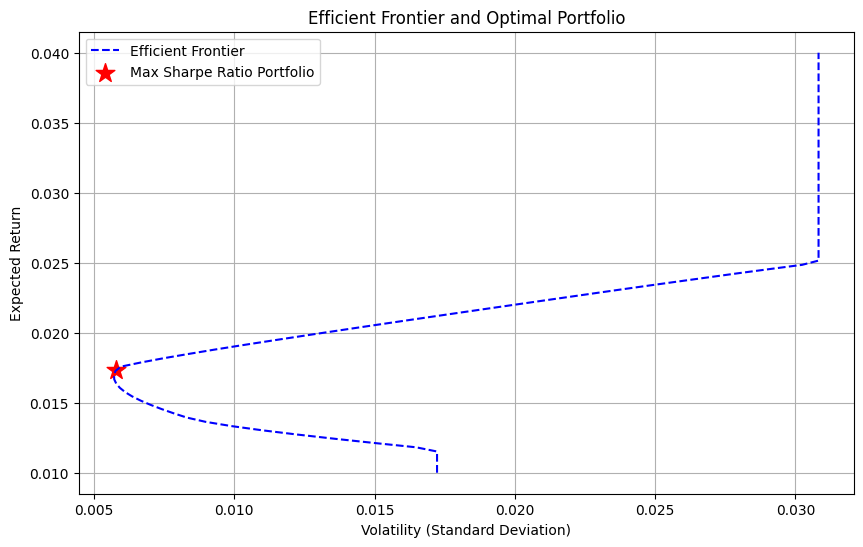

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Sample data
data = {
    'AAPL': [0.01, 0.02, 0.03, -0.01, 0.04, 0.02],
    'MSFT': [0.02, 0.01, 0.02, 0.03, -0.01, 0.03],
    'GOOG': [0.03, 0.02, 0.01, -0.02, 0.02, 0.01],
    'AMZN': [0.04, -0.01, 0.02, 0.01, 0.03, 0.02],
    'TSLA': [0.05, 0.03, 0.04, -0.03, 0.01, 0.05]
}
df = pd.DataFrame(data)

# Calculate expected returns and covariance matrix
mu = df.mean()
sigma = df.cov()

# Number of assets
num_assets = len(df.columns)

# Define portfolio performance functions
def portfolio_return(weights, mu):
    return np.dot(weights, mu)

def portfolio_volatility(weights, sigma):
    return np.sqrt(np.dot(weights.T, np.dot(sigma, weights)))

# Function to maximize Sharpe Ratio (we'll minimize the negative Sharpe ratio)
def negative_sharpe_ratio(weights, mu, sigma, risk_free_rate=0.0):
    p_return = portfolio_return(weights, mu)
    p_volatility = portfolio_volatility(weights, sigma)
    return -(p_return - risk_free_rate) / p_volatility

# Optimization constraints and bounds
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1}) # Weights must sum to 1
bounds = tuple((0, 1) for asset in range(num_assets)) # Each weight must be between 0 and 1

# Initial guess for weights
initial_weights = np.array(num_assets * [1. / num_assets,])

# Optimize for the maximum Sharpe Ratio
optimal_sharpe = minimize(
    negative_sharpe_ratio,
    initial_weights,
    args=(mu, sigma),
    method='SLSQP',
    bounds=bounds,
    constraints=constraints
)

# Get the results for the max Sharpe portfolio
max_sharpe_weights = optimal_sharpe.x
max_sharpe_return = portfolio_return(max_sharpe_weights, mu)
max_sharpe_volatility = portfolio_volatility(max_sharpe_weights, sigma)
max_sharpe_value = -negative_sharpe_ratio(max_sharpe_weights, mu, sigma)

print("--- Maximum Sharpe Ratio Portfolio ---")
print("Weights:", max_sharpe_weights.round(4))
print(f"Expected Return: {max_sharpe_return:.4f}")
print(f"Expected Volatility: {max_sharpe_volatility:.4f}")
print(f"Sharpe Ratio: {max_sharpe_value:.4f}")
print("--------------------------------------")

# Plotting the Efficient Frontier
frontier_returns = np.linspace(0.01, 0.04, 100)
frontier_volatilities = []

for r in frontier_returns:
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1},
                   {'type': 'eq', 'fun': lambda x: portfolio_return(x, mu) - r})

    result = minimize(
        fun=lambda x: portfolio_volatility(x, sigma),
        x0=initial_weights,
        method='SLSQP',
        bounds=bounds,
        constraints=constraints
    )
    frontier_volatilities.append(result.fun)

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(frontier_volatilities, frontier_returns, 'b--', label='Efficient Frontier')
plt.scatter(max_sharpe_volatility, max_sharpe_return, c='red', marker='*', s=200, label='Max Sharpe Ratio Portfolio')
plt.title('Efficient Frontier and Optimal Portfolio')
plt.xlabel('Volatility (Standard Deviation)')
plt.ylabel('Expected Return')
plt.legend()
plt.grid(True)
plt.show()

Using the yfinance library to easily get stock price data for National Stock Exchange (NSE) stocks. The key is to append .NS to the end of the stock ticker symbol for Indian equities.

Here's the updated code to fetch real data from Yahoo Finance for a few popular NSE stocks, calculate their returns and covariance, and then perform the Mean-Variance Optimization.

Implementation with NSE Data
Installation: First, install the yfinance library if you haven't already.


`!pip install yfinance`

Code: Now, let's use yfinance to fetch the data and then run the optimization. We'll use a sample of well-known stocks like Reliance, HDFC Bank, Infosys, Tata Consultancy Services (TCS), and ITC. We'll download daily data for the last 5 years to have a meaningful sample size.

The main operation performed in **mean-variance optimization (MVO)** is minimizing the portfolio's volatility for a target return or maximizing the Sharpe ratio.

---

## 1. Minimization of Volatility 📉

This is the core mathematical operation.  
Given a target return `R_target`, the optimizer finds the set of portfolio weights `w_i` that minimizes the portfolio's variance, `σ_p²`.

**Objective function (to minimize):**

`w_min σ_p² = wᵀ Σ w`

**Subject to the constraints:**

- Portfolio's expected return equals the target return:  
  `wᵀ μ = R_target`
- Sum of all weights is 1:  
  `∑ w_i = 1`
- No short selling (optional):  
  `w_i ≥ 0`

Here,  
- `w` = vector of portfolio weights  
- `μ` = vector of expected returns for each asset  
- `Σ` = covariance matrix  

By repeating this minimization for a range of target returns, you can trace out the **efficient frontier**.

---

## 2. Maximization of Sharpe Ratio 🚀

This is a specific type of MVO that finds the single optimal portfolio on the efficient frontier.  
The Sharpe ratio measures **risk-adjusted return**, and maximizing it finds the portfolio with the highest return per unit of risk.

**Objective function (to maximize):**

`Sharpe(w) = (wᵀ μ − R_f) / sqrt(wᵀ Σ w)`

This is typically solved by minimizing the **negative Sharpe ratio**:

`w_min −( (wᵀ μ − R_f) / sqrt(wᵀ Σ w) )`

**Subject to the constraints:**

- Sum of all weights is 1:  
  `∑ w_i = 1`
- No short selling (optional):  
  `w_i ≥ 0`

Here,  
- `R_p` = portfolio's expected return  
- `R_f` = risk-free rate  

---

Both operations are forms of **constrained optimization**, where a numerical solver (like `scipy.optimize.minimize` in Python) finds the optimal weights that satisfy all the specified conditions.


[*********************100%***********************]  5 of 5 completed


--- Maximum Sharpe Ratio Portfolio ---
Weight of RELIANCE.NS: 24.63%
Weight of HDFCBANK.NS: 12.38%
Weight of INFY.NS: 62.99%
Weight of TCS.NS: 0.00%
Weight of ITC.NS: 0.00%
Annualized Return: 17.68%
Annualized Volatility: 16.34%
Sharpe Ratio: 1.0815
--------------------------------------


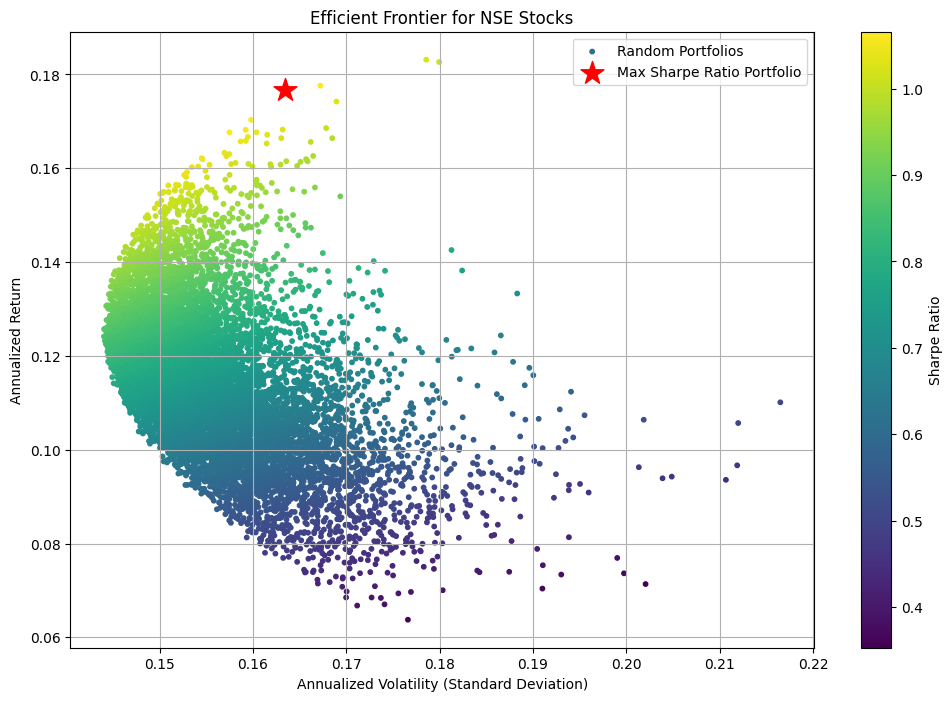

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import yfinance as yf

# List of NSE stock tickers with the .NS suffix
tickers = ['RELIANCE.NS', 'HDFCBANK.NS', 'INFY.NS', 'TCS.NS', 'ITC.NS']

# Download historical 'Adj Close' prices for the last 5 years
data = yf.download(tickers, period="5y", auto_adjust=False)['Adj Close']

# Calculate daily logarithmic returns
log_returns = np.log(data / data.shift(1)).dropna()

# Annualize expected returns and covariance
# Assuming 252 trading days in a year for the Indian market
annual_returns = log_returns.mean() * 252
annual_cov = log_returns.cov() * 252

# Number of assets
num_assets = len(tickers)

# --- Mean-Variance Optimization Functions ---

def portfolio_return(weights, returns):
    return np.sum(weights * returns)

def portfolio_volatility(weights, cov_matrix):
    return np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))

def negative_sharpe_ratio(weights, returns, cov_matrix, risk_free_rate=0.0):
    p_return = portfolio_return(weights, returns)
    p_volatility = portfolio_volatility(weights, cov_matrix)
    return -(p_return - risk_free_rate) / p_volatility

# --- Optimization for Maximum Sharpe Ratio Portfolio ---

constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
bounds = tuple((0, 1) for asset in range(num_assets))
initial_weights = np.array(num_assets * [1. / num_assets,])

optimal_sharpe = minimize(
    negative_sharpe_ratio,
    initial_weights,
    args=(annual_returns, annual_cov),
    method='SLSQP',
    bounds=bounds,
    constraints=constraints
)

# Extract and print results for the max Sharpe portfolio
max_sharpe_weights = optimal_sharpe.x
max_sharpe_return = portfolio_return(max_sharpe_weights, annual_returns)
max_sharpe_volatility = portfolio_volatility(max_sharpe_weights, annual_cov)
max_sharpe_value = -negative_sharpe_ratio(max_sharpe_weights, annual_returns, annual_cov)

print("--- Maximum Sharpe Ratio Portfolio ---")
for i, ticker in enumerate(tickers):
    print(f"Weight of {ticker}: {max_sharpe_weights[i]:.2%}")
print(f"Annualized Return: {max_sharpe_return:.2%}")
print(f"Annualized Volatility: {max_sharpe_volatility:.2%}")
print(f"Sharpe Ratio: {max_sharpe_value:.4f}")
print("--------------------------------------")

# --- Plotting the Efficient Frontier ---

num_portfolios = 10000
results = np.zeros((3, num_portfolios))
for i in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)

    p_return = portfolio_return(weights, annual_returns)
    p_volatility = portfolio_volatility(weights, annual_cov)

    results[0,i] = p_volatility
    results[1,i] = p_return
    results[2,i] = (p_return - 0) / p_volatility

plt.figure(figsize=(12, 8))
plt.scatter(results[0,:], results[1,:], c=results[2,:], cmap='viridis', s=10, label='Random Portfolios')
plt.colorbar(label='Sharpe Ratio')
plt.scatter(max_sharpe_volatility, max_sharpe_return, c='red', marker='*', s=300, label='Max Sharpe Ratio Portfolio')
plt.title('Efficient Frontier for NSE Stocks')
plt.xlabel('Annualized Volatility (Standard Deviation)')
plt.ylabel('Annualized Return')
plt.legend()
plt.grid(True)
plt.show()

### Explanation of the Code

- **Yahoo Finance**: yfinance.download(tickers, period="5y")['Adj Close']: This is the key change. We use the yfinance library to download historical adjusted closing prices for our list of NSE tickers over the last five years. The .NS suffix is crucial for fetching data from the NSE. We use 'Adj Close' prices as they are adjusted for splits and dividends, providing a more accurate representation of returns.

- **Log Returns**: We calculate logarithmic returns as they are statistically convenient for financial modeling, particularly for a series of assets. The .dropna() function removes the first row, which will have a NaN value after the shift operation.

- **Annualization**: Since our log returns are daily, we annualize the mean return and covariance matrix by multiplying by the number of trading days in a year (252 for India) to get an annualized portfolio return and volatility. This makes the results more meaningful for a long-term investment horizon.

- **Portfolio Generation**: Instead of a strict scipy.minimize loop for the efficient frontier, this code uses a Monte Carlo simulation to generate thousands of random portfolios. This is often faster and provides a great visual representation of the universe of possible portfolios, with the efficient frontier forming the upper-left boundary of the scatter plot. The optimal portfolio is then marked with a red star on the plot.

#### Real-world portfolio management involves more than just risk and return. Add a variety of constraints to the optimization problem.

- Transaction Costs: Include a term in the optimization that penalizes portfolio changes. This prevents the model from suggesting frequent, costly rebalancing.
- Asset Liquidity: Constrain the weights based on how easily an asset can be bought or sold. This is especially important for illiquid stocks or large-cap funds.
- Sector/Industry Limits: Cap the allocation to a specific sector to prevent overconcentration, a common practice to avoid systemic risk. For example, "no more than 20% of the portfolio can be in the IT sector."
- Discrete/Integer Programming: In market, you can't buy fractional shares. For small portfolios, you would use integer programming to find the optimal number of shares to buy, making the solution practical.